# Session 3 — Sentence-Level Analysis
## Measure 2: Readability Scores
This notebook computes classic readability formulas for **English** such as:
- Flesch Reading Ease
- Flesch-Kincaid Grade Level


In [1]:
import re
import matplotlib.pyplot as plt

def load_book(filepath):
    """
    Load and clean book text from Project Gutenberg files.

    This function:
    1. Opens and reads the text file
    2. Removes Project Gutenberg header/footer boilerplate
    3. Returns clean text ready for analysis

    Args:
        filepath: path to the .txt file

    Returns:
        Cleaned text as a string
    """
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    # Remove Project Gutenberg headers/footers
    # Most Gutenberg files have "*** START OF" or "CHAPTER I" markers
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif 'BOOK I' in text:
        start = text.find('BOOK I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]  # Skip past the marker line

    # Remove endings (license information)
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]

    return text.strip()

# Load both Homer epic poems
iliad_text = load_book('../data/iliad.txt')
odyssey_text = load_book('../data/odyssey.txt')

# Print confirmation and basic stats
print(f"The Iliad loaded: {len(iliad_text):,} characters")
print(f"The Odyssey loaded: {len(odyssey_text):,} characters")

The Iliad loaded: 676,445 characters
The Odyssey loaded: 610,258 characters


In [2]:
def count_syllables(word):
    """
    Simple syllable counter for English words.

    This is a heuristic (rule-based) approach:
    1. Counts groups of vowels (a, e, i, o, u, y)
    2. Adjusts for silent 'e' at the end
    3. Ensures at least 1 syllable per word

    Not perfect, but good enough for readability metrics.

    Args:
        word: a single word (string)

    Returns:
        Estimated number of syllables (integer)
    """
    word = word.lower()
    # Remove non-alphabetic characters (punctuation, numbers)
    word = re.sub(r'[^a-z]', '', word)
    if not word:
        return 1

    # Count vowel groups (consecutive vowels count as one syllable)
    # Example: "beautiful" has "eau" (1) + "i" (1) + "u" (1) = 3 syllables
    syllables = len(re.findall(r'[aeiouy]+', word))

    # Adjust for silent 'e' at the end (common in English)
    # Example: "hope" should be 1 syllable, not 2
    if word.endswith('e') and syllables > 1:
        syllables -= 1

    # Every word has at least one syllable
    return max(1, syllables)


In [3]:
def calculate_readability(text, book_name):
    """
    Calculate readability scores for a given text.

    This function computes two standard readability metrics:

    1. Flesch Reading Ease (0-100 scale):
       - 90-100: Very Easy (5th grade)
       - 60-70: Standard (8th-9th grade)
       - 0-30: Very Difficult (college graduate)
       Formula: 206.835 - 1.015*(words/sentences) - 84.6*(syllables/words)

    2. Flesch-Kincaid Grade Level:
       - Corresponds to US grade level (e.g., 8.5 = 8th grade)
       Formula: 0.39*(words/sentences) + 11.8*(syllables/words) - 15.59

    Args:
        text: the full text to analyze
        book_name: name for display purposes

    Returns:
        Tuple of (flesch_ease_score, flesch_grade_level)
    """
    # Split text into sentences
    # We split on periods, exclamation marks, and question marks followed by space
    sentences = re.split(r'[.!?]+\s+', text.strip())
    # Filter out empty or very short sentences (less than 3 words)
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]

    # Extract all words (alphabetic characters only, including apostrophes)
    # Example: "don't" stays as one word
    words = re.findall(r"[A-Za-z']+", text)

    # Count total syllables in all words
    syllables = sum(count_syllables(w) for w in words)

    # Basic counts
    num_sentences = len(sentences)
    num_words = len(words)

    # Calculate Flesch Reading Ease
    # Higher score = easier to read
    flesch_ease = 206.835 - 1.015 * (num_words / num_sentences) - 84.6 * (syllables / num_words)

    # Calculate Flesch-Kincaid Grade Level
    # Higher grade = more complex text
    flesch_grade = 0.39 * (num_words / num_sentences) + 11.8 * (syllables / num_words) - 15.59

    # Print detailed results
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Sentences: {num_sentences:,}")
    print(f"Words: {num_words:,}")
    print(f"Syllables: {syllables:,}")
    print(f"Avg words per sentence: {num_words/num_sentences:.2f}")
    print(f"Avg syllables per word: {syllables/num_words:.2f}")
    print(f"\nFlesch Reading Ease: {flesch_ease:.2f}")
    print(f"  Interpretation: ", end="")

    # Interpret the Flesch Reading Ease score
    if flesch_ease >= 90:
        print("Very Easy (5th grade)")
    elif flesch_ease >= 80:
        print("Easy (6th grade)")
    elif flesch_ease >= 70:
        print("Fairly Easy (7th grade)")
    elif flesch_ease >= 60:
        print("Standard (8th-9th grade)")
    elif flesch_ease >= 50:
        print("Fairly Difficult (10th-12th grade)")
    elif flesch_ease >= 30:
        print("Difficult (College)")
    else:
        print("Very Difficult (College graduate)")

    print(f"\nFlesch-Kincaid Grade Level: {flesch_grade:.2f}")
    print(f"  Interpretation: Suitable for grade {flesch_grade:.0f} and above")

    return flesch_ease, flesch_grade

# Calculate readability for both Homer epics
iliad_ease, iliad_grade = calculate_readability(iliad_text, "The Iliad")
odyssey_ease, odyssey_grade = calculate_readability(odyssey_text, "The Odyssey")


The Iliad
Sentences: 3,545
Words: 128,188
Syllables: 166,913
Avg words per sentence: 36.16
Avg syllables per word: 1.30

Flesch Reading Ease: 59.98
  Interpretation: Fairly Difficult (10th-12th grade)

Flesch-Kincaid Grade Level: 13.88
  Interpretation: Suitable for grade 14 and above

The Odyssey
Sentences: 3,146
Words: 117,890
Syllables: 152,036
Avg words per sentence: 37.47
Avg syllables per word: 1.29

Flesch Reading Ease: 59.70
  Interpretation: Fairly Difficult (10th-12th grade)

Flesch-Kincaid Grade Level: 14.24
  Interpretation: Suitable for grade 14 and above


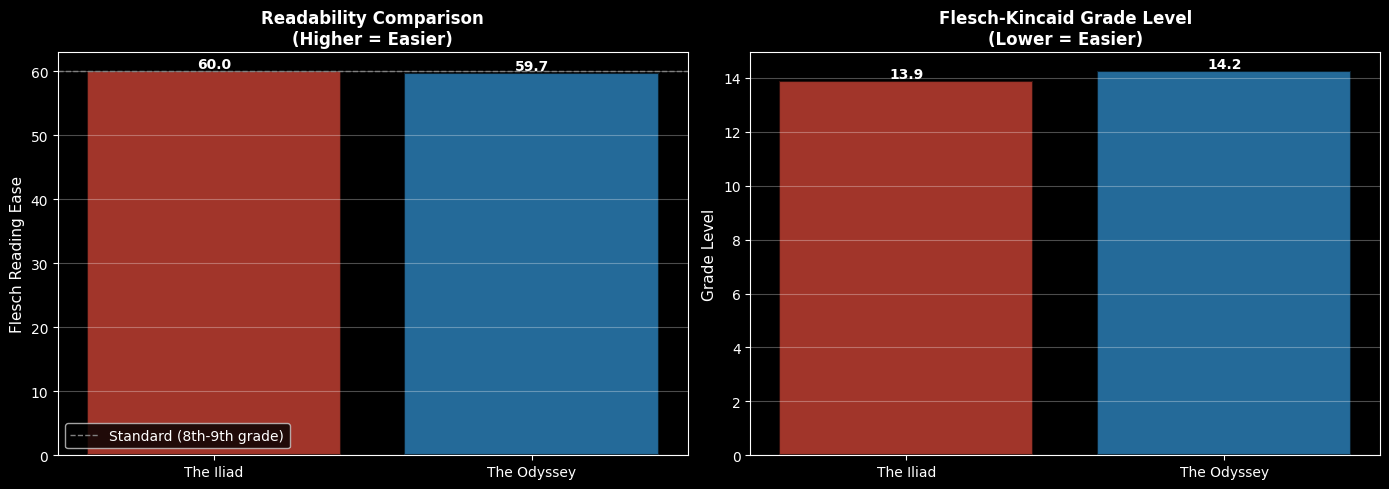


SUMMARY
Both Homeric epics show similar readability levels.
The Iliad: Flesch Ease = 60.0, Grade Level = 13.9
The Odyssey: Flesch Ease = 59.7, Grade Level = 14.2

These scores reflect:
- Epic poetry's elevated language and complex sentence structures
- Translation style (formal, literary English)
- Long, descriptive passages typical of oral tradition

Note: Readability scores are designed for modern prose.
Epic poetry naturally scores as 'difficult' due to its formal style.


In [4]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- LEFT PLOT: Flesch Reading Ease comparison ----
ax1 = axes[0]
books = ['The Iliad', 'The Odyssey']
ease_scores = [iliad_ease, odyssey_ease]
colors = ['#e74c3c', '#3498db']  # Red for Iliad, Blue for Odyssey

# Create bar chart
bars1 = ax1.bar(books, ease_scores, color=colors, edgecolor='black',
                linewidth=1.5, alpha=0.7)

ax1.set_ylabel('Flesch Reading Ease', fontsize=11)
ax1.set_title('Readability Comparison\n(Higher = Easier)',
              fontsize=12, fontweight='bold')

# Add reference line at "Standard" level (60 = 8th-9th grade)
ax1.axhline(y=60, color='gray', linestyle='--', linewidth=1,
            label='Standard (8th-9th grade)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

# ---- RIGHT PLOT: Flesch-Kincaid Grade Level comparison ----
ax2 = axes[1]
grade_scores = [iliad_grade, odyssey_grade]

# Create bar chart
bars2 = ax2.bar(books, grade_scores, color=colors, edgecolor='black',
                linewidth=1.5, alpha=0.7)

ax2.set_ylabel('Grade Level', fontsize=11)
ax2.set_title('Flesch-Kincaid Grade Level\n(Lower = Easier)',
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#Summary

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print("Both Homeric epics show similar readability levels.")
print(f"The Iliad: Flesch Ease = {iliad_ease:.1f}, Grade Level = {iliad_grade:.1f}")
print(f"The Odyssey: Flesch Ease = {odyssey_ease:.1f}, Grade Level = {odyssey_grade:.1f}")
print("\nThese scores reflect:")
print("- Epic poetry's elevated language and complex sentence structures")
print("- Translation style (formal, literary English)")
print("- Long, descriptive passages typical of oral tradition")
print("\nNote: Readability scores are designed for modern prose.")
print("Epic poetry naturally scores as 'difficult' due to its formal style.")